## Simple Linear Regression with sklearn

### Import the libs

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

### Load the data

In [31]:
data = pd.read_csv('../data/1_01_simple_linear_regression.csv')

In [32]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


### Create the regression

SAT is the independent variable (feature)
GPA is the dependenent variable

In [33]:
x = data['SAT']    # called input or feature
y = data['GPA']    # called output or target

In [34]:
x.shape

(84,)

In [35]:
x_matrix = x.values.reshape(-1,1)  # Making a 2D array, as requested by sklearn.
                                   # That's because we have one single feature in this case.
                                   # Generally, there are more features involved, so this would not be needed.

In [36]:
x_matrix.shape

(84, 1)

In [37]:
y.shape

(84,)

### Regression itself

In [38]:
reg = LinearRegression()

In [39]:
# Fit the regression. Note the order in this case: 1st is x (the input), 2nd is y (the target).
reg.fit(x_matrix, y)

LinearRegression()

### R-squared

In [40]:
reg.score(x_matrix, y)   # This returns the R-squared of a linear regression.

0.40600391479679754

### Coefficients

In [41]:
reg.coef_      # The coefficient of the SAT. It's an array since multiple coefficents can exist.

array([0.00165569])

### Intercept

In [42]:
reg.intercept_   # The intercept (the "const" in the StatsModels OLS summary). 
                 # It's a float since a simple linear regression alwasy has a single intercept.

0.2750402996602799

### Make predictions

In [60]:
sat_array = np.array([1740]).reshape(-1,1)
reg.predict(sat_array)                     # Predict the GPA for an SAT score of 1740.

array([3.15593751])

In [61]:
new_data = pd.DataFrame(data=[1740,1760])
new_data

,0
0,1740
1,1760


In [63]:
new_data['Predicted_GPA'] = reg.predict(new_data)     # Two predictions are returned in this case.

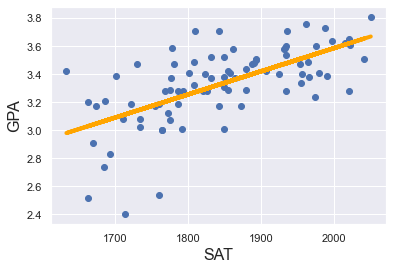

In [67]:
plt.scatter(x,y)
yhat = reg.coef_ * x_matrix + reg.intercept_        # yhat = 0.0017 * x + 0.275
fig = plt.plot(x, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=16)
plt.ylabel('GPA', fontsize=16)
plt.show()